<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE30338](https://jckantor.github.io/CBE30338)
by Jeffrey Kantor (jeff at nd.edu); the content is available [on Github](https://github.com/jckantor/CBE30338.git).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [Continuous Product Blending](http://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/02.04-Continuous-Product-Blending.ipynb) | [Contents](toc.ipynb) | [Exothermic Continuous Stirred Tank Reactor](http://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/02.06-Exothermic-CSTR.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/notebooks/02.05-Hare-and-Lynx-Population-Dynamics.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Hare and Lynx Population Dynamics


## Summary

This notebook provides an introduction to nonlinear dynamics using a well-known model for the preditor-prey interaction of Snowshoe Hare and Canadian Lynx. Topics include limit cycles, the existence of multiple steady states, and simple phase plane analysis using nullclines. This notebook can be displayed as a slide presentation.

## Introduction

[Snowshoe hare](https://en.wikipedia.org/wiki/Snowshoe_hare) (*Lepus americanus*) are the primary food for the [Canadian lynx](https://en.wikipedia.org/wiki/Canada_lynx) (*Lynx canadensis*) in the Northern boreal forests of North America. When hare are abundant, Lynx will eat hare about two every three days almost to the complete exclusion of other foods. As a consequence, the population dynamics of the two species are closely linked. 

<table>
    <tr>
        <td>
<a title="kdee64 (Keith Williams) [CC BY 2.0 (https://creativecommons.org/licenses/by/2.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Canadian_lynx_by_Keith_Williams.jpg"><img width="305" alt="Canadian lynx by Keith Williams" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Canadian_lynx_by_Keith_Williams.jpg/256px-Canadian_lynx_by_Keith_Williams.jpg"></a>
kdee64 (Keith Williams) [<a href="https://creativecommons.org/licenses/by/2.0">CC BY 2.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Canadian_lynx_by_Keith_Williams.jpg">via Wikimedia Commons</a>
        </td>
        <td>
<a title="D. Gordon E. Robertson [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Snowshoe_Hare,_Shirleys_Bay.jpg"><img width="256" alt="Snowshoe Hare, Shirleys Bay" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Snowshoe_Hare%2C_Shirleys_Bay.jpg/256px-Snowshoe_Hare%2C_Shirleys_Bay.jpg"></a>
D. Gordon E. Robertson [<a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Snowshoe_Hare,_Shirleys_Bay.jpg">via Wikimedia Commons</a>
        </td>
    </tr>
</table>

It has been known for over a century that the populations of the two species vary dramatically in cycles of 8 to 11 year duration. This chart, for example, shows pelt-trading data taken from the Hudson's Bay Company (from MacLulich, 1937.  See important notes on this data in [Stenseth, 1997](http://www.pnas.org/content/94/10/5147.full))

<a title="CNX OpenStax [CC BY 4.0 (https://creativecommons.org/licenses/by/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Figure_45_06_01.jpg"><img width="512" alt="Figure 45 06 01" src="https://upload.wikimedia.org/wikipedia/commons/1/16/Figure_45_06_01.jpg"></a>
CNX OpenStax [<a href="https://creativecommons.org/licenses/by/4.0">CC BY 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Figure_45_06_01.jpg">via Wikimedia Commons</a>

The actual cause of the cycling is still a matter of scientific inquiry. Hypotheses include the inherent instability of the preditor-prey dynamics, the dynamics of a more complex food web, and the role of climate (see [Zhang, 2007](http://www.int-res.com/articles/feature/c034p083.pdf)). The discussion in this notebook addresses the preditor-prey dynamics.

## Historical Data

A digitized version of the historical data is available from [D. R. Hundley at Whitman College](http://people.whitman.edu/~hundledr/courses/M250F03/M250.html). The following cell reads the data from the url, imports it into a pandas dataframe, and creates a plot. 

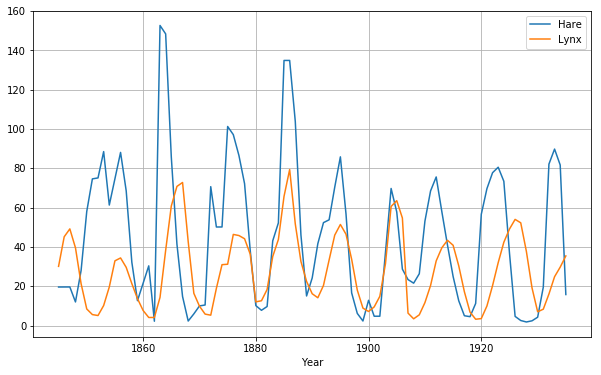

In [1]:
%matplotlib inline
import pandas as pd

url = 'http://people.whitman.edu/~hundledr/courses/M250F03/LynxHare.txt'
df = pd.read_csv(url, delim_whitespace=True, header=None, index_col=0)
df.index.name = 'Year'
df.columns = ['Hare', 'Lynx']
df.plot(figsize=(10,6), grid=True)

## Population Dynamics

### Model Equations

The model equatons describe the time rate of change of the population densities of hare ($H$) and lynx ($L$). Each is the difference between the birth and death rate. The death rate of hare is coupled to the population density of lynx. The birth rate of lynx is a simple multiple of the death rate of hare.

$$\begin{align*}\frac{dH}{dt} & = \underbrace{rH\left(1-\frac{H}{k}\right)}_{Hare Birth Rate}-\underbrace{\frac{aHL}{c+H}}_{Hare Death Rate}\\
\frac{dL}{dt} & = \underbrace{a\frac{bHL}{c+H}}_{Lynx Birth Rate}-\underbrace{dL}_{Lynx Death Rate}
\end{align*}$$

### Parameter Values

| Parameter | Symbol | Value |
| - | :----: | :---: |
| Lynx/Hare Predation Rate | $a$ | 3.2 |
| Lynx/Hare Conversion | $b$ | 0.6 |
| Lynx/Hare Michaelis Constant| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare Reproduction Rate | $r$ | 1.6 |

## Simulation using the scipy.odeint()

### Step 1. Initialization

The `SciPy` library includes functions for integrating differential equations. Of these, the function `odeint` provides an easy-to-use general purpose algorithm well suited to this type of problem.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Step 2. Establish Parameter Values

Set global default values for the parameters

In [3]:
# default parameter values
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

### Step 3.  Write function for the RHS of the Differential Equations

`deriv` is a function that returns a two element list containting values for the derivatives of $H$ and $L$. The first argument is a two element list with values of $H$ and $L$, followed by the current time $t$.

$$\begin{align*}
\frac{dH}{dt} & = r H \left(1-\frac{H}{k}\right) - \frac{a H L}{c + H} \\
\frac{dL}{dt} & = b\frac{a H L}{c + H} - dL
\end{align*}$$

In [4]:
# differential equations
def deriv(X,t):
    H,L = X
    dH =  r*H*(1-H/k) - a*H*L/(c+H)
    dL = b*a*H*L/(c+H) - d*L
    return [dH,dL]

### Step 4. Choose Time Grid, Initial Conditions, and Integrate

In [5]:
# perform simulation
t = np.linspace(0,70,500)       # time grid
IC = [20,20]                    # initial conditions for H and L
sol = odeint(deriv,IC,t)        # compute solution
H,L = sol.transpose()           # unpack solution 

### Step 5. Visualize and Analyze the Solution

For this choice of parameters and initial conditions, the Hare/Lynx population exhibits sustained oscillations.

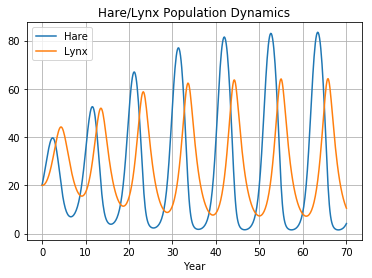

In [6]:
plt.plot(t,H,t,L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare','Lynx'])
plt.grid(True)

#### Phase Plane

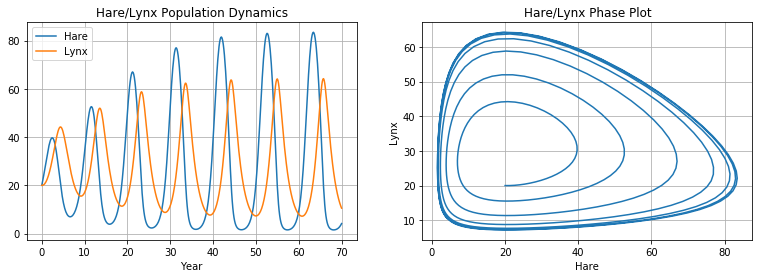

In [7]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(t,H,t,L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare','Lynx'])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(H,L)
plt.title('Hare/Lynx Phase Plot')
plt.ylabel('Lynx')
plt.xlabel('Hare')
plt.grid(True)

## Nullclines

Nullclines are the points in the phase plane where the derivatives are equal to zero. 

The nullclines for hare are where 

$$\frac{dH}{dt} = 0 \implies \begin{cases}
\begin{align*}
H^* & = 0 \\
\\
L^* & = \frac{r}{a}\left(c+H\right)\left(1-\frac{H}{k}\right)
\end{align*}
\end{cases}$$

The nullclines for Lynx are where 

$$\frac{dL}{dt} = 0 \implies \begin{cases}
\begin{align*}
L^* & = 0 \\
\\
H^* & = \frac{c d}{a b - d}
\end{align*}
\end{cases}$$

For convenience, we create a function to plots the nullclines and steady states that occur where the nullclines intersect.

In [8]:
def plotNullclines():
    # nullcline dH/dt = 0
    Hp = np.linspace(0,k)
    Lp = (r/a)*(c+Hp)*(1-Hp/k)
    plt.plot(Hp,Lp,'b')
    plt.ylim(0,130)
    plt.xlim(0,150)
    
    # nullcline dL/dt = 0
    Hd = c*d/(a*b-d)
    plt.plot([Hd,Hd],plt.ylim(),'r')

    # additional nullclines
    plt.plot([0,0],plt.ylim(),'b')
    plt.plot(plt.xlim(),[0,0],'r')

    # steady states
    Hss = c*d/(a*b-d)
    Lss = r*(1-Hss/k)*(c+Hss)/a
    plt.plot([0,k,Hss],[0,0,Lss],'r.',ms=20)

    plt.xlabel('Hare')
    plt.ylabel('Lynx')
    plt.legend(['dH/dt = 0','dL/dt = 0'])  

Here's a plot of the nullclines for the default parameter values. The steady states correspond to 

* No Hare, and no Lynx.
* Hare population at the carry capacity of the environment, and no Lynx
* Coexistence of Hare and Lynx.

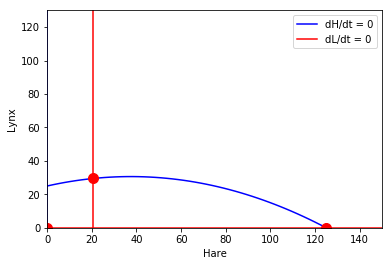

In [9]:
plotNullclines()

Visualization of the nullclines give us some insight into how the Hare and Lynx populations depend on the model parameters. Here we look at how the nullclines depend on the Hare/Lynx predation rate $a$.

In [10]:
from ipywidgets import interact

def sim(aslider= 3.2):
    global a
    a = aslider
    plt.xlim(0,150)
    plt.ylim(0,130)
    plotNullclines()
    
interact(sim,aslider=(1.25,4,.01))

interactive(children=(FloatSlider(value=3.2, description='aslider', max=4.0, min=1.25, step=0.01), Output()), …

<function __main__.sim(aslider=3.2)>

## Interactive Simulation

### Visualization Function

The visualization function for this example accepts a list of time values, values of $H$ and $L$, and model parameters. The model parameters are needed to plot nullclines and steady states on the phase plane.

In [11]:
# visualization
def HLPlot(t,H,L):
    # time axis
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(t,H)
    plt.plot(t,L)
    plt.xlabel('Time [years]')
    plt.ylabel('Population Density')
    plt.legend(['Hare','Lynx'],loc='upper left')
    
    # phase plane
    plt.subplot(1,2,2)
    plt.plot(H,L)
    plt.xlim(0,150)
    plt.ylim(0,130)
    plotNullclines()

### Simulation Function

An additional function is created to encapsulate the entire process of solving the model and displaying the solution. The function takes arguments specifing the initial values of $H$ and $L$, and a value of the parameter $a$.  These argument 

In [12]:
# default parameter values
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

# perform simulation
t = np.linspace(0,70,500)

def LynxHare(H=20,L=20,aslider=3.2):
    IC = [H,L]
    global a
    a = aslider
    sol = odeint(deriv,IC,t)
    HLPlot(t,sol[:,0],sol[:,1])

Use the `aslider` to adjust values of the Hare/Lynx interaction.  Can you indentify stable and unstable steady states?

In [13]:
from ipywidgets import interact
interact(LynxHare, H = (0,80,1), L =(0,80,1), aslider=(1.25,4.0,0.01));

interactive(children=(IntSlider(value=20, description='H', max=80), IntSlider(value=20, description='L', max=8…

## Stability of a Steady State

### 1. Unstable Focus 

Any displacement from an unstable focus leads to a trajectory that spirals away from the steady state. 

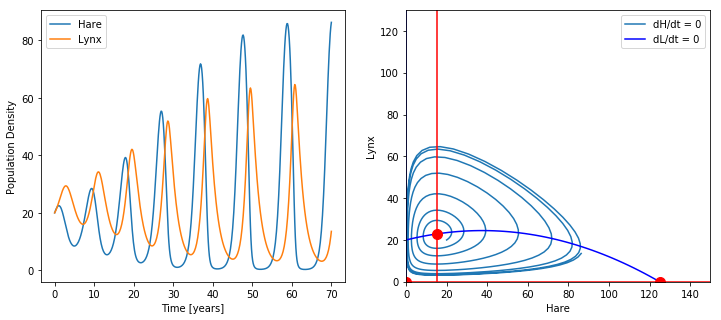

In [14]:
LynxHare(H=20,L=20,aslider = 4)

### 2. Stable Focus 

Small displacements from a stable focus results in trajectories that spiral back towards the steady state.

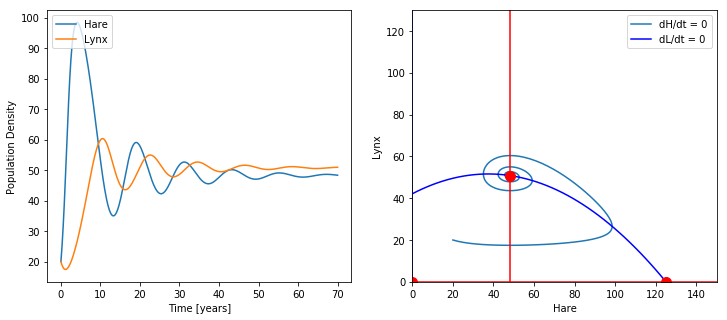

In [15]:
LynxHare(H=20,L=20,aslider = 1.9)

### 3. Stable and Unstable Nodes

Displacements from a steady state either move towards (stable) or away from (unstable) nodes without the spiral structure of a focus.

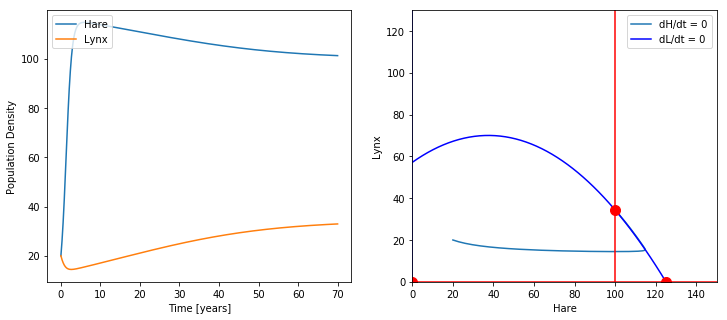

In [16]:
LynxHare(H=20,L=20,aslider = 1.4)

## Summary

Hope you enjoyed this brief introduction to the modeling of a small food web. This is a fascinating field with many important and unanswered questions. Recent examples in the research literature are [here](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0108243) and [here](http://science.sciencemag.org/content/320/5876/658). 

What you should learn from this notebook:

* How to simulate small systems of nonlinear ODEs.
* How to plot trajectories in a phase plane.
* How to plot the nullclines of two differential equations with constant parameters.
* Solve systems for multiple steady states.
* Recognize limit cycles, steady-states, stable and unstable foci, stable and unstable nodes.

## Suggested Exercise

Explore the impact of the parameter $a$ on the nature of the solution. $a$ is proporational to the success of the Lynx hunting the Hare.  What happens when the value is low?  high?  Can you see the transitions from conditions when the Lynx done't survive, the emergence of a stable coexistence steady-state, and finally the emergence of a stable limit cycle?

<!--NAVIGATION-->
< [Continuous Product Blending](http://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/02.04-Continuous-Product-Blending.ipynb) | [Contents](toc.ipynb) | [Exothermic Continuous Stirred Tank Reactor](http://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/02.06-Exothermic-CSTR.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/notebooks/02.05-Hare-and-Lynx-Population-Dynamics.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>